In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from os import getcwd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

2024-02-09 16:45:40.229104: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-09 16:45:40.324359: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 16:45:41.216094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 16:45:41.217635: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 16:45:41.340053: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
train_data = pd.read_csv("sign_mnist_train.csv")
test_data = pd.read_csv("sign_mnist_test.csv")

In [3]:
training_images = train_data.iloc[:,1:].values
training_labels = train_data.iloc[:,0].values

In [4]:
testing_images = test_data.iloc[:,1:].values
testing_labels = test_data.iloc[:,0].values

In [5]:
training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)

In [6]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


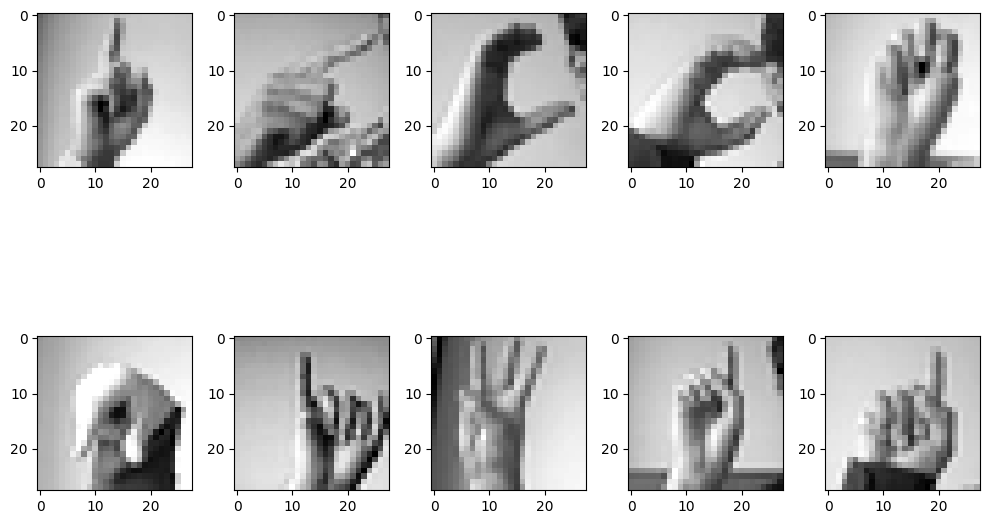

In [7]:
# Plotting the first 10 images 

fig, ax = plt.subplots(2,5) 
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [8]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)



model.evaluate(testing_images, testing_labels, verbose=0)

2024-02-09 16:46:31.059874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-09 16:46:31.062962: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/tmp/ipykernel_24781/290978939.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),


Epoch 1/10
857/857 [==============================] - 22s 24ms/step - loss: 2.6430 - accuracy: 0.1929 - val_loss: 1.6770 - val_accuracy: 0.4774
Epoch 2/10
857/857 [==============================] - 14s 17ms/step - loss: 1.8433 - accuracy: 0.4050 - val_loss: 1.2301 - val_accuracy: 0.5756
Epoch 3/10
857/857 [==============================] - 11s 13ms/step - loss: 1.4352 - accuracy: 0.5306 - val_loss: 0.9518 - val_accuracy: 0.6520
Epoch 4/10
857/857 [==============================] - 18s 21ms/step - loss: 1.1695 - accuracy: 0.6169 - val_loss: 0.7057 - val_accuracy: 0.7375
Epoch 5/10
857/857 [==============================] - 11s 13ms/step - loss: 1.0002 - accuracy: 0.6679 - val_loss: 0.5814 - val_accuracy: 0.7847
Epoch 6/10
857/857 [==============================] - 12s 13ms/step - loss: 0.8669 - accuracy: 0.7127 - val_loss: 0.4216 - val_accuracy: 0.8419
Epoch 7/10
857/857 [==============================] - 11s 13ms/step - loss: 0.7774 - accuracy: 0.7398 - val_loss: 0.3509 - val_accuracy:

[258.7333984375, 0.5538204312324524]

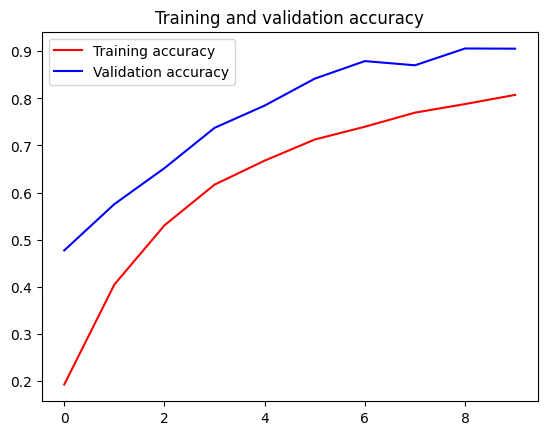

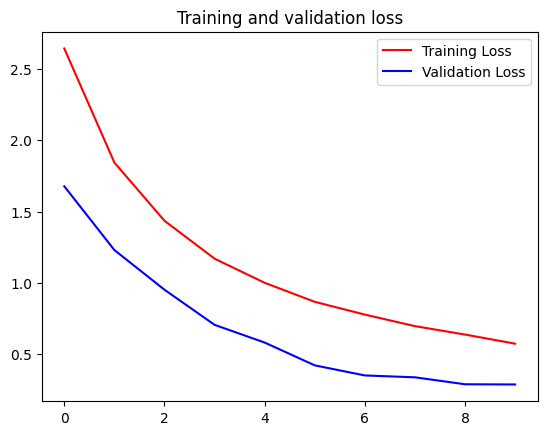

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [11]:
# Predictions
predictions_prob = model.predict(testing_images)
predictions_classes = np.argmax(predictions_prob, axis=1)

# Adjusting predictions if necessary
for i in range(len(predictions_classes)):
    if predictions_classes[i] >= 9:
        predictions_classes[i] += 1

# Displaying the first five predictions
print(predictions_classes[:5])

225/225 [==============================] - 1s 4ms/step
[24 23 11 14 25]


In [15]:
classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(test_data['label'], predictions_classes, target_names = classes))

              precision    recall  f1-score   support

     Class 0       0.92      0.34      0.49       331
     Class 1       1.00      0.34      0.50       432
     Class 2       1.00      0.94      0.97       310
     Class 3       0.60      0.05      0.09       245
     Class 4       0.78      0.58      0.67       498
     Class 5       0.70      0.88      0.78       247
     Class 6       0.78      0.04      0.08       348
     Class 7       0.99      0.23      0.37       436
     Class 8       0.44      0.99      0.60       288
    Class 10       0.00      0.00      0.00       331
    Class 11       0.00      0.00      0.00       209
    Class 12       0.00      0.00      0.00       394
    Class 13       0.02      0.05      0.03       291
    Class 14       0.00      0.00      0.00       246
    Class 15       0.00      0.00      0.00       347
    Class 16       0.00      0.00      0.00       164
    Class 17       0.00      0.00      0.00       144
    Class 18       0.00    

/home/somu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/somu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/somu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/somu/.local/lib/python3.10/site-packages/skle

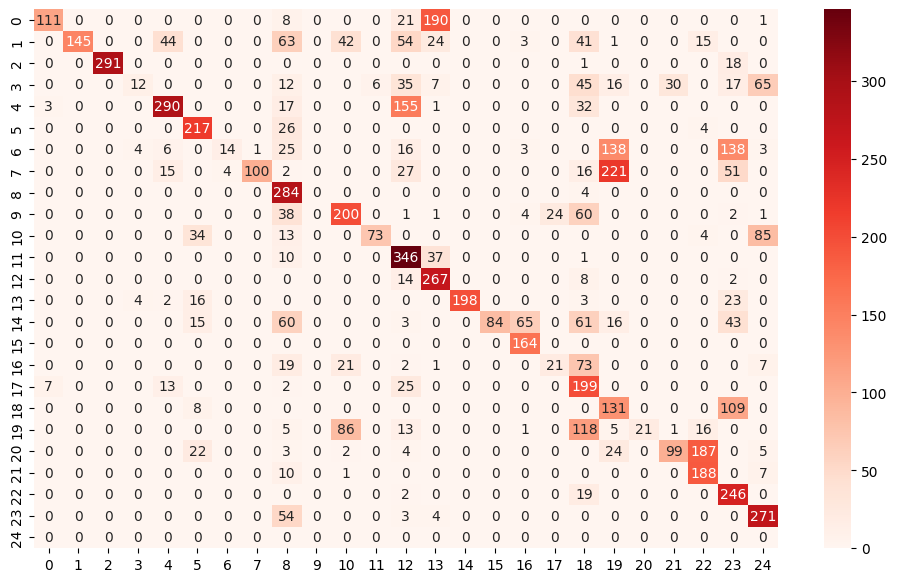

In [16]:
# Confusion Matrix for the model predictions
cm = confusion_matrix(test_data['label'],predictions_classes)

plt.figure(figsize=(12,7))
g = sns.heatmap(cm, cmap='Reds',annot=True,
           fmt='')